<a href="https://colab.research.google.com/github/Jesus-David-Silva-Rangel-19/Vacio/blob/main/Financial_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaciones**

In [ ]:
# importa las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns
import kagglehub
import warnings
import re

warnings.filterwarnings('ignore')

# descarga los datos desde Kaggle
path1 = kagglehub.dataset_download("willianoliveiragibin/financial-risk-v2")

# descarga la fuente tipográfica para las visualizaciones
path2 = kagglehub.dataset_download("jessdavidsilvarangel/font-palatino-linotype")

# descarga la fuente dos
path3 = kagglehub.dataset_download("jessdavidsilvarangel/kelly-slab")

# imprime las rutas
print("La ruta al conjunto de datos es:", path1)
print("La ruta a la fuente Palatino Linotype es:", path2)
print("La ruta a la fuente Kelly Slab es:", path3)

Using Colab cache for faster access to the 'financial-risk-v2' dataset.
Using Colab cache for faster access to the 'font-palatino-linotype' dataset.
Using Colab cache for faster access to the 'kelly-slab' dataset.
La ruta al conjunto de datos es: /kaggle/input/financial-risk-v2
La ruta a la fuente Palatino Linotype es: /kaggle/input/font-palatino-linotype
La ruta a la fuente Kelly Slab es: /kaggle/input/kelly-slab


In [ ]:
# Configurar tamaño de los gráficos
plt.rcParams['figure.figsize'] = [6, 4]

# define el estilo de los gráficos
plt.style.use('default')

# Configurar paleta de colores
sns.set_palette('viridis')

# Tamaño de letra
plt.rcParams['font.size'] = 12

# Ruta a la fuente personalizada
font_path = '/kaggle/input/kelly-slab/KellySlab-Regular.ttf'

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

plt.rcParams.update({
    "font.family": font_prop.get_name(),
    "font.weight": "bold",
    "axes.titleweight": "bold",
    "lines.linewidth": 1.5,
    "lines.color": "black"
   # "axes.labelweight": "bold",
   # "axes.titleweight": "bold",
})

# **Carga y Análisis Inicial de Datos**

In [ ]:
# carga los datos
df = pd.read_csv('/kaggle/input/financial-risk-v2/Loan new datset.csv')

# imprime las primeras filas
df.head(7)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,35.441.791.880.765.800,1,2,35.833.559.969.819.100,0,Home,0,29,9,7632,1202,146111,19183,3329.0,7.249.720.460.524.030,11,126928,19.965.200.000.000.000,22.758.963.035.547.000,4.198.059.915.607.370,18.107.719.782.539.400,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,8.782.696.820.034.870,5,3,330.273.669.928.854,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,33.090.833.333.333.300,9.351.320.992.549.320,3,43609,207.045,2.010.771.214.969.360,7.940.542.382.198.960,3.898.524.480.253.530,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,13.741.410.423.759.700,2,0,24.472.910.913.284.900,0,Education,0,20,22,886,895,25176,128874,33.936.666.666.666.600,8.722.406.105.782.900,6,5205,21.762.700.000.000.000,21.254.800.984.525.700,6.664.066.876.774.690,4.621.569.652.325.320,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,2.675.871.369.453.280,2,1,4.362.442.650.682.680,0,Home,0,27,10,1675,1217,104822,5370,5757.0,8.961.547.069.636.460,5,99452,300.398,3.009.108.491.496.010,10.475.069.802.292.900,3.130.983.116.604.640,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,3.205.353.247.385.240,0,0,788.842.122.687.955,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8.605.333.333.333.330,9.413.687.393.229.140,5,227019,197.184,17.599.017.877.532.800,33.017.914.048.482.300,7.020.984.743.780.870,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,0,Rent,732,10.221.133.683.825.600,5,1,2.593.664.008.403.890,0,Debt Consolidation,1,16,19,2118,1223,67914,40843,14.859.166.666.666.600,7.560.793.594.714.330,5,27071,21.743.300.000.000.000,21.760.115.512.283.300,3.855.770.741.531.950,7.521.128.870.976.580,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,0,Rent,337,3.673.803.425.383.350,6,1,1.274.727.031.804.660,0,Other,0,21,18,5161,1735,65624,43894,4.270.833.333.333.330,8.842.751.265.040.520,5,21730,225.741,20.527.096.780.610.300,39.130.035.166.528.900,1.705.288.628.289.450,0,50.0


In [ ]:
# imprime las últimas filas
df.tail(7)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19993,2072-09-27,50,30578,588,Employed,Bachelor,29,14654,48,Single,...,25.481.666.666.666.600,889.638.565.911.373,3,3445,215.654,18.893.578.478.478.800,43.733.382.868.117.700,2.253.909.982.397.180,0,60.0
19994,2072-09-28,51,33354,562,Employed,High School,30,22082,36,Single,...,2779.5,9.230.751.047.120.740,12,228771,22.608.199.999.999.900,2.488.819.960.103.530,8.766.712.980.386.900,3.837.637.337.789.850,0,50.0
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.0,826.217.411.448.541,1,55327,216.021,19.557.396.188.243.000,9.057.677.122.709.420,627.740.641.062.005,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4.103.833.333.333.330,8.166.182.124.087.570,3,64002,227.318,19.916.828.935.026.400,9.583.956.331.892.300,33.441.797.502.885.000,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,40.798.333.333.333.300,8.872.157.531.840.430,3,103663,22.953.300.000.000.000,2.267.663.557.690.310,9.454.274.540.030.640,35.722.720.388.979.800,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.75,8.437.868.903.906.300,5,10600,24.975.999.999.999.900,26.487.268.168.119.900,41.116.828.420.252.200,4.086.781.087.246.860,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4.435.583.333.333.330,8.538.013.647.236.590,5,41372,24.005.500.000.000.000,24.269.330.464.959.500,10.498.304.065.347.600,29.800.599.091.470.800,0,59.0


In [ ]:
# muestra la información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ApplicationDate             20000 non-null  object
 1   Age                         20000 non-null  int64 
 2   AnnualIncome                20000 non-null  int64 
 3   CreditScore                 20000 non-null  int64 
 4   EmploymentStatus            20000 non-null  object
 5   EducationLevel              20000 non-null  object
 6   Experience                  20000 non-null  int64 
 7   LoanAmount                  20000 non-null  int64 
 8   LoanDuration                20000 non-null  int64 
 9   MaritalStatus               20000 non-null  object
 10  NumberOfDependents          20000 non-null  int64 
 11  HomeOwnershipStatus         20000 non-null  object
 12  MonthlyDebtPayments         20000 non-null  int64 
 13  CreditCardUtilizationRate   20000 non-null  ob

In [ ]:
# cuenta cada tipo de dato
df.dtypes.value_counts().sort_values(ascending=False)

,count
int64,21
object,15


In [ ]:
# muestra la estructura del dataset
df.shape

(20000, 36)

In [ ]:
# estadísticas de resumen
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,NetWorth,LoanApproved
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,3.023350,0.993000,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,5.002650,7.229432e+04,0.239000
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,1.736161,0.986965,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,2.236804,1.179200e+05,0.426483
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,0.000000,1.000000e+03,0.000000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,2.000000,0.000000,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,3.000000,8.734750e+03,0.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,3.000000,1.000000,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,5.000000,3.285550e+04,0.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,4.000000,2.000000,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6.000000,8.882550e+04,0.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,13.000000,7.000000,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,16.000000,2.603208e+06,1.000000


# **Limpieza y Transformación de Datos**

**Crea una copia de los datos**

In [ ]:
# crea una copia del dataset
df_clean = df.copy()
print(f"Copia creada. El dataset tiene {df_clean.shape[0]} filas y {df_clean.shape[1]} columnas.")

Copia creada. El dataset tiene 20000 filas y 36 columnas.


**Elimina la limitación de visualización de Pandas**

In [ ]:
# forzar pandas a mostrar todas las columnas y el contenido completo
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# imprime las columnas completas
print("Mostrando primeras 10 filas (head) con TODAS las columnas:\n")
df_clean.head(10)

Mostrando primeras 10 filas (head) con TODAS las columnas:



,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,35.441.791.880.765.800,1,2,35.833.559.969.819.100,0,Home,0,29,9,7632,1202,146111,19183,3329.0,7.249.720.460.524.030,11,126928,19.965.200.000.000.000,22.758.963.035.547.000,4.198.059.915.607.370,18.107.719.782.539.400,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,8.782.696.820.034.870,5,3,330.273.669.928.854,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,33.090.833.333.333.300,9.351.320.992.549.320,3,43609,207.045,2.010.771.214.969.360,7.940.542.382.198.960,3.898.524.480.253.530,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,13.741.410.423.759.700,2,0,24.472.910.913.284.900,0,Education,0,20,22,886,895,25176,128874,33.936.666.666.666.600,8.722.406.105.782.900,6,5205,21.762.700.000.000.000,21.254.800.984.525.700,6.664.066.876.774.690,4.621.569.652.325.320,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,2.675.871.369.453.280,2,1,4.362.442.650.682.680,0,Home,0,27,10,1675,1217,104822,5370,5757.0,8.961.547.069.636.460,5,99452,300.398,3.009.108.491.496.010,10.475.069.802.292.900,3.130.983.116.604.640,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,3.205.353.247.385.240,0,0,788.842.122.687.955,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8.605.333.333.333.330,9.413.687.393.229.140,5,227019,197.184,17.599.017.877.532.800,33.017.914.048.482.300,7.020.984.743.780.870,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,0,Rent,732,10.221.133.683.825.600,5,1,2.593.664.008.403.890,0,Debt Consolidation,1,16,19,2118,1223,67914,40843,14.859.166.666.666.600,7.560.793.594.714.330,5,27071,21.743.300.000.000.000,21.760.115.512.283.300,3.855.770.741.531.950,7.521.128.870.976.580,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,0,Rent,337,3.673.803.425.383.350,6,1,1.274.727.031.804.660,0,Other,0,21,18,5161,1735,65624,43894,4.270.833.333.333.330,8.842.751.265.040.520,5,21730,225.741,20.527.096.780.610.300,39.130.035.166.528.900,1.705.288.628.289.450,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,5,Mortgage,288,20.976.758.316.772.100,5,0,39.556.763.512.473.100,0,Other,0,19,11,781,74,50177,11556,8.112.083.333.333.330,9.334.924.144.306.600,5,38621,226.634,20.911.294.209.821.400,18.273.600.549.751.000,2.607.665.587.313.290,1,42.400.000.000.000.000
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,5,Own,638,1.927.011.647.841.360,3,0,3.132.332.595.016.420,1,Debt Consolidation,0,25,29,1157,708,29632,49940,9736.75,7.283.969.266.537.550,3,7711,258.853,291.539.424.809.367,17.621.990.260.211.600,2.465.092.588.411.080,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,4,Other,704,5.124.646.439.687.660,3,2,5.051.480.267.602.310,0,Other,0,23,10,1028,446,129664,12852,33.845.833.333.333.300,6.153.232.100.036.340,3,116812,184.443,19.727.060.238.590.000,2.353.577.423.938.190,9.033.837.027.516.500,0,53.0


In [ ]:
# verifica los datos
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ApplicationDate             20000 non-null  object
 1   Age                         20000 non-null  int64 
 2   AnnualIncome                20000 non-null  int64 
 3   CreditScore                 20000 non-null  int64 
 4   EmploymentStatus            20000 non-null  object
 5   EducationLevel              20000 non-null  object
 6   Experience                  20000 non-null  int64 
 7   LoanAmount                  20000 non-null  int64 
 8   LoanDuration                20000 non-null  int64 
 9   MaritalStatus               20000 non-null  object
 10  NumberOfDependents          20000 non-null  int64 
 11  HomeOwnershipStatus         20000 non-null  object
 12  MonthlyDebtPayments         20000 non-null  int64 
 13  CreditCardUtilizationRate   20000 non-null  ob

**Limpia valores numéricos mal formateados**

In [ ]:
# función de limpieza
def clean_numeric_data(s):
    s = s.astype(str).str.strip()
    s = s.str.replace(r'[^\d.,%-]', '', regex=True)

    # si hay múltiples puntos, se asumen como separadores de miles
    s = s.apply(lambda x: x.replace('.', '') if x.count('.') > 1 else x)

    # detectar formato decimal europeo
    if s.str.contains(',').any() and not s.str.contains('\.').any():
        s = s.str.replace(',', '.', regex=False)
    elif s.str.contains(',\d{3}').any():
        s = s.str.replace(',', '', regex=False)

    # detectar y manejar porcentajes
    is_pct = s.str.endswith('%')
    s_pct = s[is_pct].str.rstrip('%')

    s_num = pd.to_numeric(s.str.rstrip('%'), errors='coerce')
    if is_pct.any():
        s_num[is_pct] = pd.to_numeric(s_pct, errors='coerce') / 100.0

    return s_num

In [ ]:
# función para corregir escala solo si los valores son enormes
def scale_large_numbers(s, threshold=1e6, factor=1e6):
    """Escala los números mayores que threshold a millones (factor=1e6)."""
    return s.apply(lambda x: x / factor if pd.notnull(x) and abs(x) > threshold else x)

**Verifica columnas numéricas candidatas a limpiar**

In [ ]:
# columnas candidatas a limpieza
numeric_cols = [
    'CreditCardUtilizationRate',
    'DebtToIncomeRatio',
    'MonthlyIncome',
    'UtilityBillsPaymentHistory',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore',
    'NetWorth'
]

# aplicar limpieza y conversión
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = clean_numeric_data(df_clean[col])
        df_clean[col] = scale_large_numbers(df_clean[col], threshold=1e6, factor=1e6)

**Verifica valores nulos e inconsistencias**

In [ ]:
# verifica inconsistencias después de la limpieza
df_clean.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,3.544179e+10,1,2,3.583356e+10,0,Home,0,29,9,7632,1202,146111,19183,3.329000e+03,7.249720e+09,11,126928.0,1.996520e+10,2.275896e+10,4.198060e+09,1.810772e+10,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,8.782697e+09,5,3,3.302737e+08,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3.309083e+10,9.351321e+09,3,43609.0,2.070450e+02,2.010771e+09,7.940542e+09,3.898524e+09,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,1.374141e+10,2,0,2.447291e+10,0,Education,0,20,22,886,895,25176,128874,3.393667e+10,8.722406e+09,6,5205.0,2.176270e+10,2.125480e+10,6.664067e+09,4.621570e+09,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,2.675871e+09,2,1,4.362443e+09,0,Home,0,27,10,1675,1217,104822,5370,5.757000e+03,8.961547e+09,5,99452.0,3.003980e+02,3.009108e+09,1.047507e+10,3.130983e+09,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,3.205353e+09,0,0,7.888421e+08,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8.605333e+09,9.413687e+09,5,227019.0,1.971840e+02,1.759902e+10,3.301791e+10,7.020985e+09,1,36.0


In [ ]:
# muestra la información del conjunto de datos
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

**Convertir el formato de las fechas**

In [ ]:
# convierte el formato de fechas
df_clean['ApplicationDate'] = pd.to_datetime(df_clean['ApplicationDate'], errors='coerce')
print("Columna convertida correctamente a formato datetime.")

Columna convertida correctamente a formato datetime.


In [ ]:
# información de la columa formateada
df_clean['ApplicationDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: ApplicationDate
Non-Null Count  Dtype         
--------------  -----         
20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.4 KB


In [ ]:
# información de los datos en general
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

# **Tratamiento de Valores Faltantes**

In [ ]:
# verifica los valores nulos
df_clean.isnull().sum().sort_values(ascending=False)

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


# **Visualizaciones de Datos**

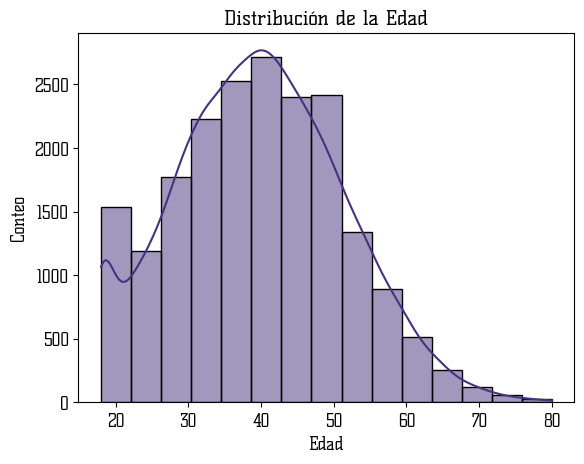

In [ ]:
# histograma
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Distribución de la Edad', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()

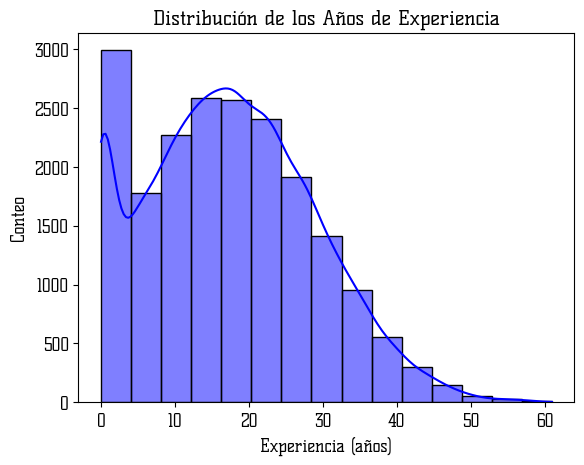

In [ ]:
# histograma
sns.histplot(df['Experience'], bins=15, color='blue', kde=True)
plt.title('Distribución de los Años de Experiencia', fontweight='bold')
plt.xlabel('Experiencia (años)')
plt.ylabel('Conteo')
plt.show()

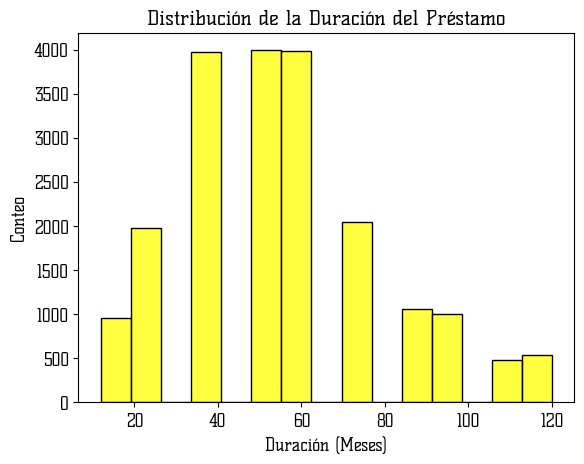

In [ ]:
# histograma
sns.histplot(df['LoanDuration'], bins=15, color='yellow')
plt.title('Distribución de la Duración del Préstamo', fontweight='bold')
plt.xlabel('Duración (Meses)')
plt.ylabel('Conteo')
plt.show()

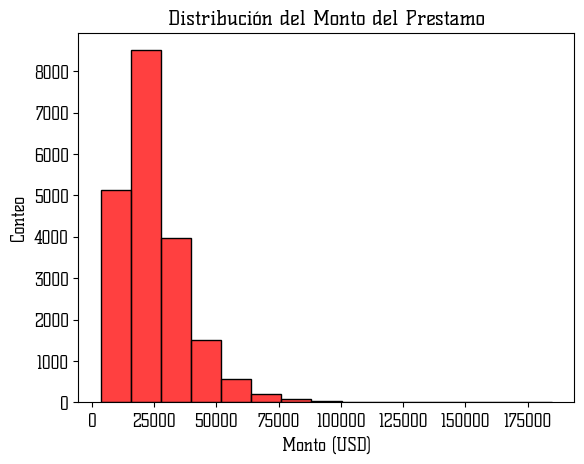

In [ ]:
# histograma
sns.histplot(df['LoanAmount'], bins=15, color='red')
plt.title('Distribución del Monto del Prestamo', fontweight='bold')
plt.xlabel('Monto (USD)')
plt.ylabel('Conteo')
plt.show()

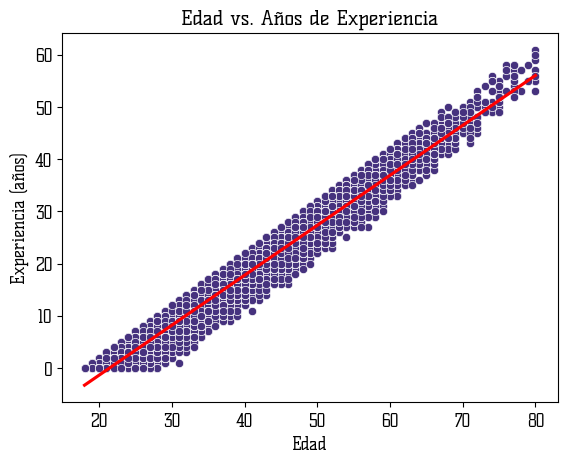

In [ ]:
# grafico de dispersion
sns.scatterplot(x=df['Age'], y=df['Experience'])
sns.regplot(x=df['Age'], y=df['Experience'], scatter=False, color='red')
plt.title('Edad vs. Años de Experiencia', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Experiencia (años)')
plt.show()

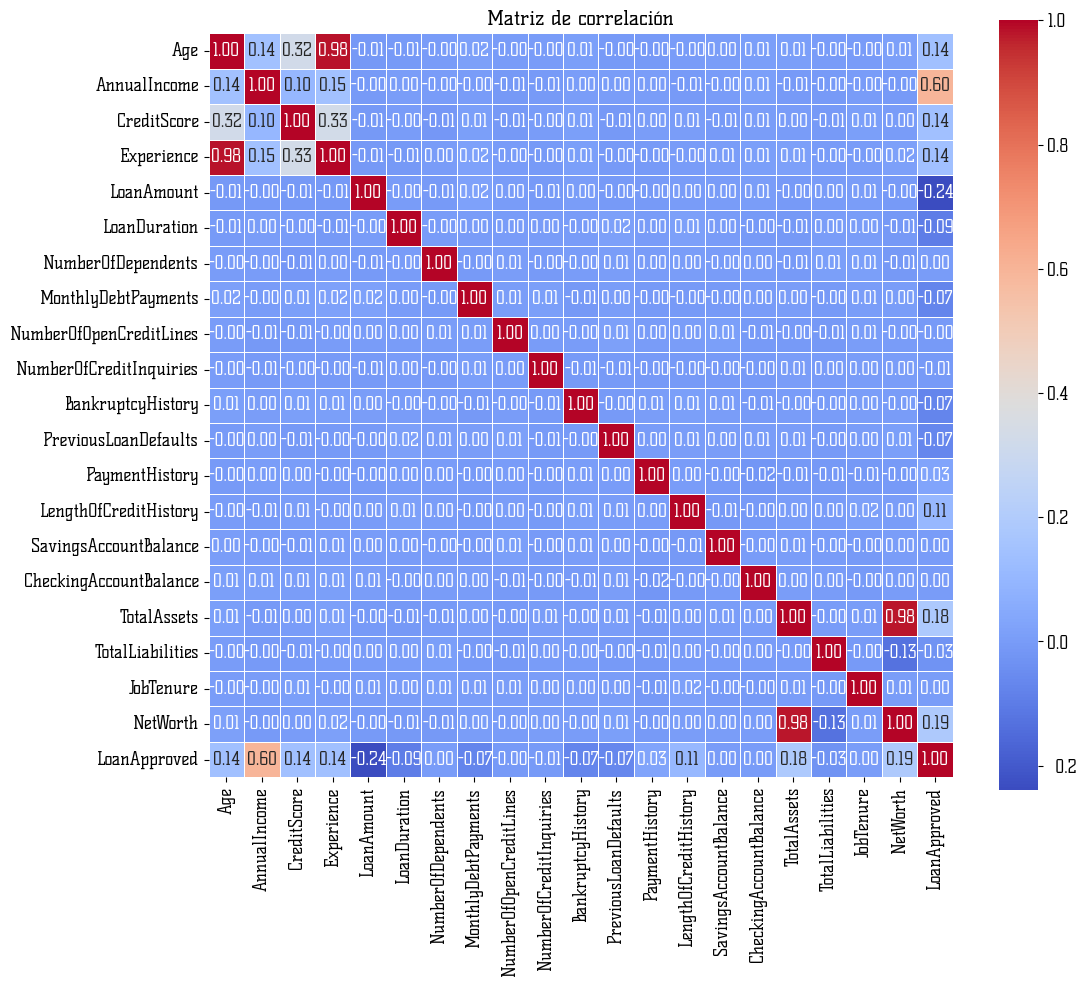

In [ ]:
# seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=np.number)

# calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# mostrar el mapa de calor con valores
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidth=0.6)
plt.title('Matriz de correlación', fontweight='bold')
plt.show()

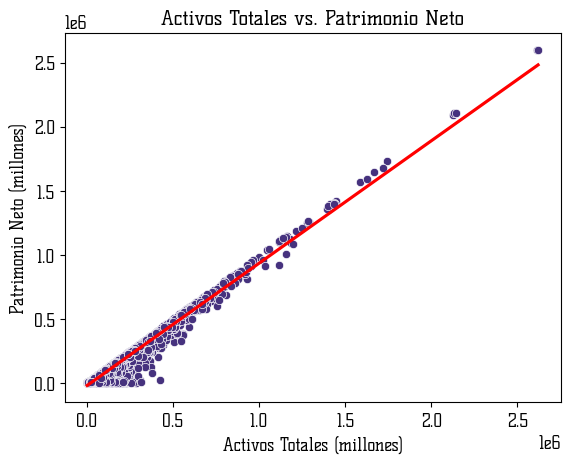

In [ ]:
# grafico de dispersion
sns.scatterplot(x=df['TotalAssets'], y=df['NetWorth'])
sns.regplot(x=df['TotalAssets'], y=df['NetWorth'], scatter=False, color='red')
plt.title('Activos Totales vs. Patrimonio Neto', fontweight='bold')
plt.xlabel('Activos Totales (millones)')
plt.ylabel('Patrimonio Neto (millones)')
plt.show()

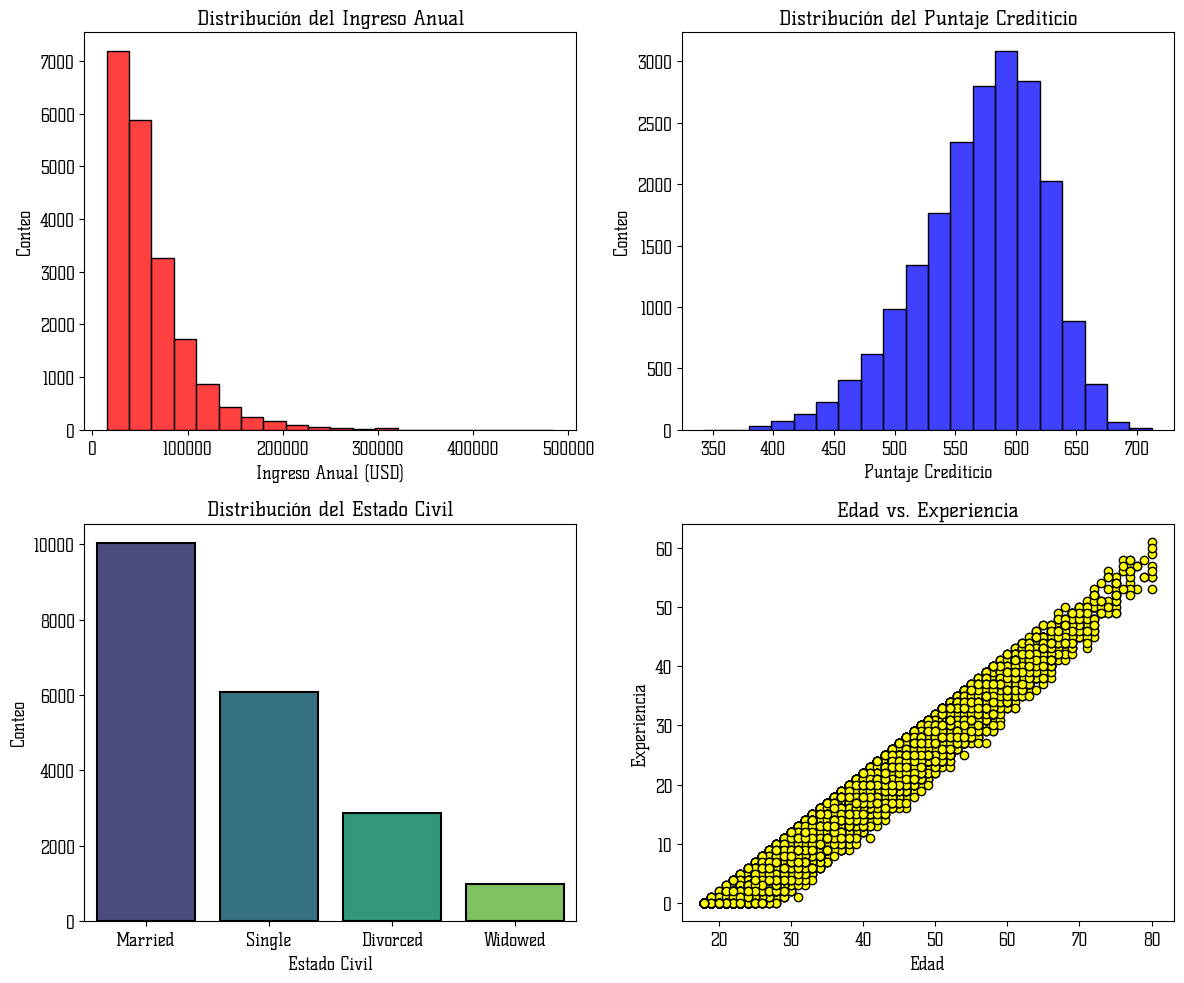

In [ ]:
# crea el objeto
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# histograma
sns.histplot(df['AnnualIncome'], bins=20, ax=ax[0, 0], color='red')
ax[0, 0].set_title('Distribución del Ingreso Anual')
ax[0, 0].set_xlabel('Ingreso Anual (USD)')
ax[0, 0].set_ylabel('Conteo')

# histograma
sns.histplot(df['CreditScore'], bins=20, ax=ax[0, 1], color='blue')
ax[0, 1].set_title('Distribución del Puntaje Crediticio')
ax[0, 1].set_xlabel('Puntaje Crediticio')
ax[0, 1].set_ylabel('Conteo')

# grafico de barras
sns.countplot(x='MaritalStatus', data=df, palette='viridis', ax=ax[1, 0], linewidth=1.5, edgecolor='black')
ax[1, 0].set_title('Distribución del Estado Civil')
ax[1, 0].set_xlabel('Estado Civil')
ax[1, 0].set_ylabel('Conteo')

# gráfico de dispersión
sns.scatterplot(x=df['Age'], y=df['Experience'], ax=ax[1, 1], color='yellow', linewidth=1, edgecolor='black')
ax[1, 1].set_title('Edad vs. Experiencia')
ax[1, 1].set_xlabel('Edad')
ax[1, 1].set_ylabel('Experiencia')

plt.tight_layout()
plt.show()

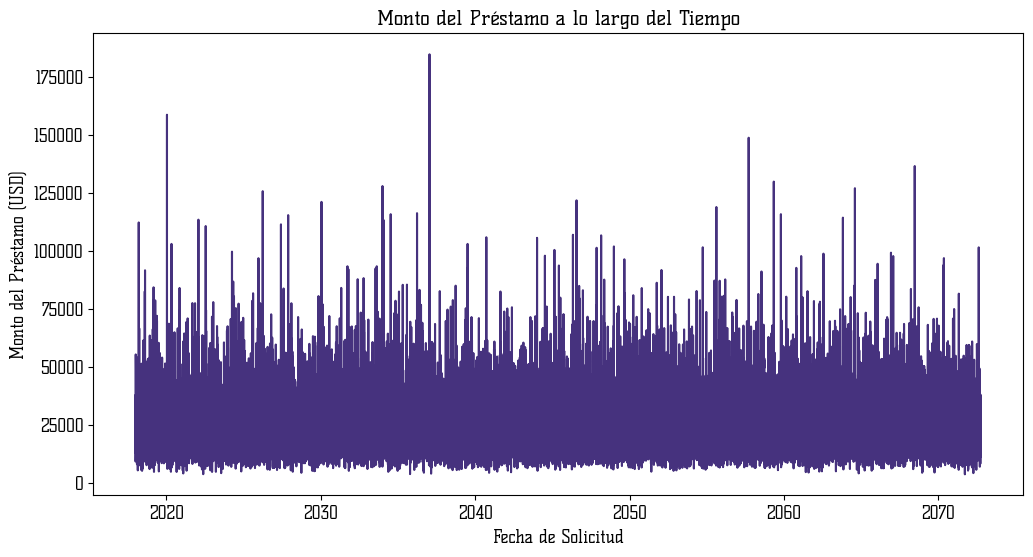

In [ ]:
# crea un gráfico de series temporales del monto del préstamo
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_clean['ApplicationDate'], y=df_clean['LoanAmount'])
plt.title('Monto del Préstamo a lo largo del Tiempo')
plt.xlabel('Fecha de Solicitud')
plt.ylabel('Monto del Préstamo (USD)')
plt.show()

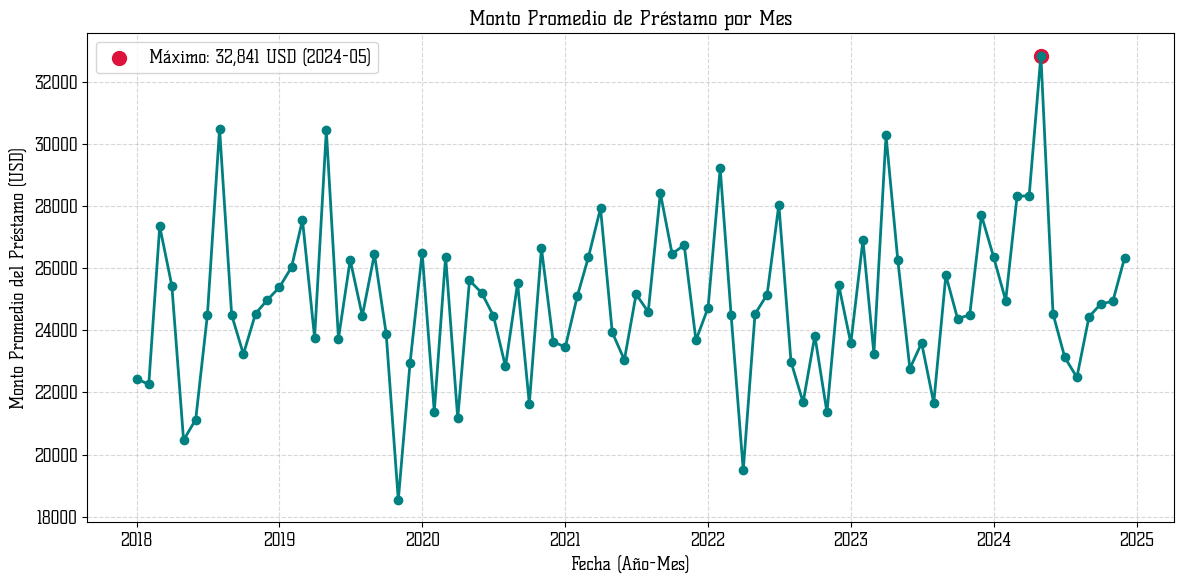

In [ ]:
# Filtrar fechas hasta 2024
df_clean = df_clean[df_clean['ApplicationDate'].dt.year <= 2024]

# Agrupar por año y mes
monthly_avg = df_clean.groupby([df_clean['ApplicationDate'].dt.year, df_clean['ApplicationDate'].dt.month])['LoanAmount'].mean()

# Crear un índice de fechas para el eje X
fechas = [pd.Timestamp(year=a, month=m, day=1) for a, m in monthly_avg.index]

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(fechas, monthly_avg.values, marker='o', color='teal', linewidth=2)

# Resaltar el punto máximo
max_idx = monthly_avg.idxmax()
max_fecha = pd.Timestamp(year=max_idx[0], month=max_idx[1], day=1)
max_valor = monthly_avg.max()
plt.scatter(max_fecha, max_valor, color='crimson', s=100,
            label=f"Máximo: {max_valor:,.0f} USD ({max_idx[0]}-{max_idx[1]:02d})")

# Estilo
plt.title('Monto Promedio de Préstamo por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Fecha (Año-Mes)', fontsize=12)
plt.ylabel('Monto Promedio del Préstamo (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

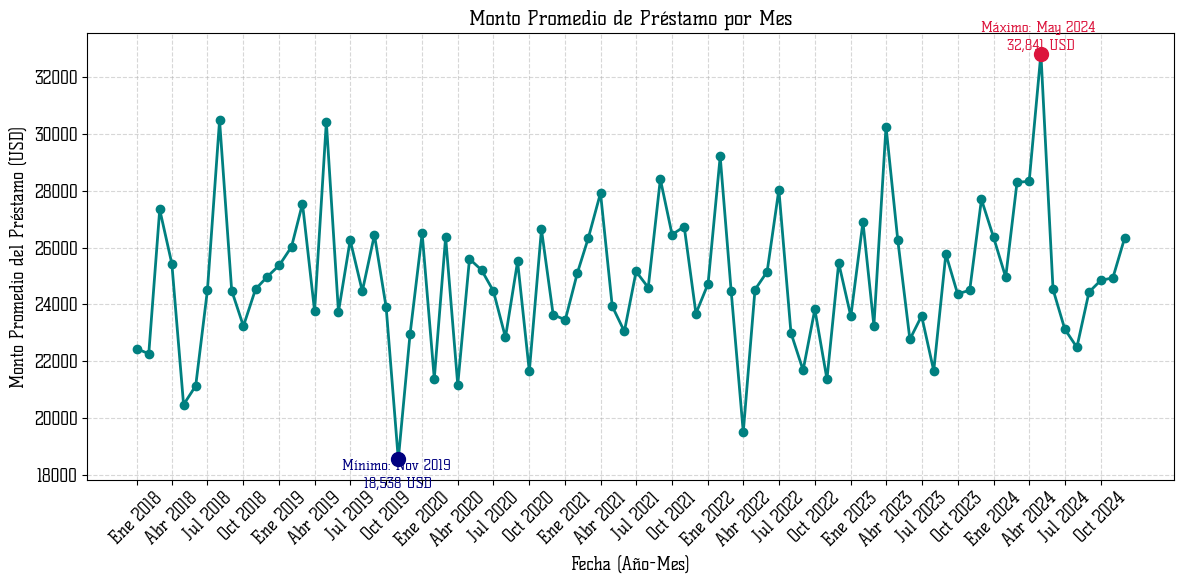

In [ ]:
# Filtrar fechas hasta 2024
df_clean = df_clean[df_clean['ApplicationDate'].dt.year <= 2024]

# Agrupar por año y mes
monthly_avg = df_clean.groupby(
    [df_clean['ApplicationDate'].dt.year, df_clean['ApplicationDate'].dt.month]
)['LoanAmount'].mean()

# Crear índice de fechas
fechas = [pd.Timestamp(year=a, month=m, day=1) for a, m in monthly_avg.index]

# Crear nombres abreviados de meses en español
meses_esp = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(fechas, monthly_avg.values, marker='o', color='teal', linewidth=2)

# Identificar máximo y mínimo
max_idx = monthly_avg.idxmax()
min_idx = monthly_avg.idxmin()

max_fecha = pd.Timestamp(year=max_idx[0], month=max_idx[1], day=1)
min_fecha = pd.Timestamp(year=min_idx[0], month=min_idx[1], day=1)
max_valor = monthly_avg.max()
min_valor = monthly_avg.min()

# Resaltar puntos
plt.scatter(max_fecha, max_valor, color='crimson', s=100, zorder=5)
plt.scatter(min_fecha, min_valor, color='navy', s=100, zorder=5)

# Etiquetas con nombres de mes en español
plt.text(max_fecha, max_valor,
         f"Máximo: {meses_esp[max_idx[1]-1]} {max_idx[0]} \n{max_valor:,.0f} USD",
         color='crimson', fontsize=10, ha='center', va='bottom', fontweight='bold')

plt.text(min_fecha, min_valor,
         f"Mínimo: {meses_esp[min_idx[1]-1]} {min_idx[0]} \n{min_valor:,.0f} USD",
         color='navy', fontsize=10, ha='center', va='top', fontweight='bold')

# Estilo general
plt.title('Monto Promedio de Préstamo por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Fecha (Año-Mes)', fontsize=12)
plt.ylabel('Monto Promedio del Préstamo (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar formato del eje X con meses abreviados
plt.xticks(fechas[::3],  # Mostrar cada 3 meses para legibilidad
           [f"{meses_esp[f.month-1]} {f.year}" for f in fechas[::3]],
           rotation=45)

plt.tight_layout()
plt.show()

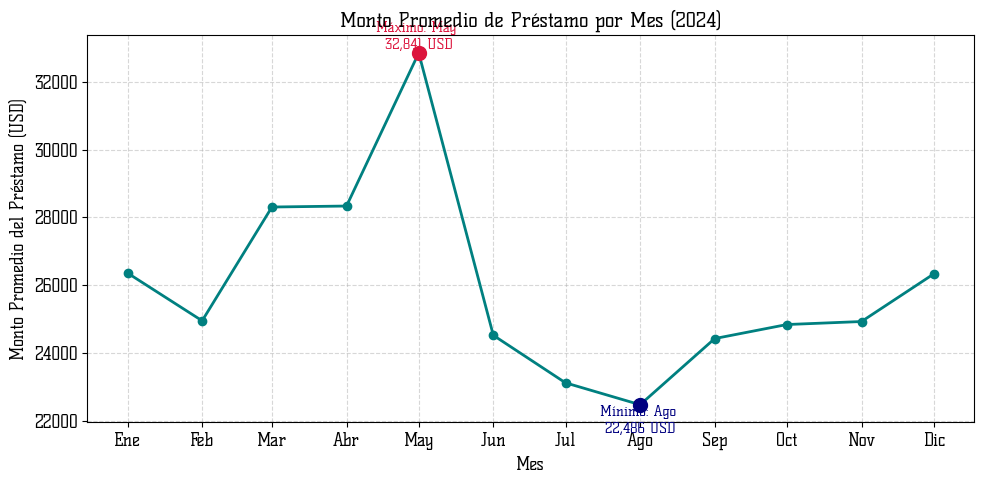

In [ ]:
# Filtrar fechas solo del año 2024
df_2024 = df_clean[df_clean['ApplicationDate'].dt.year == 2024]

# Agrupar por mes
monthly_avg_2024 = df_2024.groupby(df_2024['ApplicationDate'].dt.month)['LoanAmount'].mean()

# Crear fechas e índice
fechas = [pd.Timestamp(year=2024, month=m, day=1) for m in monthly_avg_2024.index]

# Nombres abreviados de meses en español
meses_esp = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
             'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(fechas, monthly_avg_2024.values, marker='o', color='teal', linewidth=2)

# Identificar máximo y mínimo
max_idx = monthly_avg_2024.idxmax()
min_idx = monthly_avg_2024.idxmin()

max_fecha = pd.Timestamp(year=2024, month=max_idx, day=1)
min_fecha = pd.Timestamp(year=2024, month=min_idx, day=1)
max_valor = monthly_avg_2024.max()
min_valor = monthly_avg_2024.min()

# Resaltar puntos
plt.scatter(max_fecha, max_valor, color='crimson', s=100, zorder=5)
plt.scatter(min_fecha, min_valor, color='navy', s=100, zorder=5)

# Etiquetas
plt.text(max_fecha, max_valor,
         f"Máximo: {meses_esp[max_idx-1]} \n{max_valor:,.0f} USD",
         color='crimson', fontsize=10, ha='center', va='bottom', fontweight='bold')

plt.text(min_fecha, min_valor,
         f"Mínimo: {meses_esp[min_idx-1]} \n{min_valor:,.0f} USD",
         color='navy', fontsize=10, ha='center', va='top', fontweight='bold')

# Estilo general
plt.title('Monto Promedio de Préstamo por Mes (2024)', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Monto Promedio del Préstamo (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Solo nombres de mes en español en el eje X
plt.xticks(fechas, [meses_esp[f.month-1] for f in fechas])

plt.tight_layout()
plt.show()

# **Análisis Estadístico**

In [ ]:
# muestra la estadisticas de resumen
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,NumberOfOpenCreditLines,NumberOfCreditInquiries,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,JobTenure,NetWorth,LoanApproved
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,3.023350,0.993000,0.052400,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,5.002650,7.229432e+04,0.239000
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,1.736161,0.986965,0.222838,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,2.236804,1.179200e+05,0.426483
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,0.000000,1.000000e+03,0.000000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,2.000000,0.000000,0.000000,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,3.000000,8.734750e+03,0.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,3.000000,1.000000,0.000000,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,5.000000,3.285550e+04,0.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,4.000000,2.000000,0.000000,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6.000000,8.882550e+04,0.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,13.000000,7.000000,1.000000,1.000000,45.000000,29.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,16.000000,2.603208e+06,1.000000


In [ ]:
# imprime las estadísticas de la edad
print('La edad media es:', df['Age'].mean().round(2))
print('La edad mínima es:', df['Age'].min())
print('La edad máxima es:', df['Age'].max())
print('La desviación estándar de la edad es:', df['Age'].std())

La edad media es: 39.75
La edad mínima es: 18
La edad máxima es: 80
La desviación estándar de la edad es: 11.62271257548677


**¿Cuál es el perfil demográfico promedio de los solicitantes de préstamo?**

In [ ]:
# calcula las estadísticas
mean_age = df_clean['Age'].mean()
median_age = df_clean['Age'].median()
mean_dependents = df_clean['NumberOfDependents'].mean()
top_employment = df_clean['EmploymentStatus'].value_counts(normalize=True).idxmax()
top_education = df_clean['EducationLevel'].value_counts(normalize=True).idxmax()

# imprime los resultados
print("Perfil demográfico promedio:")
print(f"- Edad media: {mean_age:.1f} años (mediana {median_age:.1f}).")
print(f"- Dependientes promedio: {mean_dependents:.2f}.")
print(f"- Estado de empleo más frecuente: {top_employment}.")
print(f"- Nivel educativo más frecuente: {top_education}.\n")

Perfil demográfico promedio:
- Edad media: 39.8 años (mediana 40.0).
- Dependientes promedio: 1.52.
- Estado de empleo más frecuente: Employed.
- Nivel educativo más frecuente: Bachelor.



**¿Cuáles son las características financieras de los solicitantes?**

In [ ]:
# calcula las estadísticas
mean_annual_income = df_clean['AnnualIncome'].mean()
median_annual_income = df_clean['AnnualIncome'].median()
mean_loan_amount = df_clean['LoanAmount'].mean()
median_loan_duration = df_clean['LoanDuration'].median()
mean_credit_score = df_clean['CreditScore'].mean()

# imprime los resultados
print("Características financieras:")
print(f"- Ingreso anual medio: {mean_annual_income:,.2f} (mediana {median_annual_income:,.2f}).")
print(f"- Monto de préstamo medio: {mean_loan_amount:,.2f}.")
print(f"- Duración mediana del préstamo: {median_loan_duration:.0f} meses.")
print(f"- Credit score medio: {mean_credit_score:.1f}.\n")

Características financieras:
- Ingreso anual medio: 59,161.47 (mediana 48,566.00).
- Monto de préstamo medio: 24,882.87.
- Duración mediana del préstamo: 48 meses.
- Credit score medio: 571.6.



**¿Cuál es la distribución de los ingresos y del patrimonio neto?**

In [ ]:
# distribución de las variables
df_clean[['AnnualIncome', 'NetWorth']].describe()

,AnnualIncome,NetWorth
count,20000.000000,20000.000000
mean,59161.473550,69678.908815
std,40350.845168,101341.666648
min,15000.000000,1.005198
25%,31679.000000,8682.750000
50%,48566.000000,32571.000000
75%,74391.000000,88054.250000
max,485341.000000,982011.000000


**¿Qué tan probable es que un préstamo sea aprobado en este dataset?**

In [ ]:
# calcula la media
p_approved = df_clean['LoanApproved'].mean()

# imprime porcentualmente
print(f"Probabilidad de aprobación: {p_approved:.2%}")

Probabilidad de aprobación: 23.90%


**¿Qué tan probable es que un cliente tenga un puntaje de riesgo alto?**

In [ ]:
# calcula la probabilidad
high_risk = df_clean['RiskScore'] > 60
p_high_risk = high_risk.mean()
print(f"Probabilidad de alto riesgo: {p_high_risk:.2%}")

Probabilidad de alto riesgo: 8.50%


**¿Cuál es la probabilidad de que un préstamo sea aprobado si el cliente tiene bajo riesgo (RiskScore ≤ 40)?**

In [ ]:
# calcula la probabilidad
low_risk = df_clean['RiskScore'] <= 40
p_approved_given_low_risk = df_clean.loc[low_risk, 'LoanApproved'].mean()
print(f"P(Aprobado | Bajo riesgo) = {p_approved_given_low_risk:.2%}")

P(Aprobado | Bajo riesgo) = 99.70%


**¿Cuál es la probabilidad de que un préstamo sea rechazado si el cliente tiene alto riesgo (RiskScore > 60)?**

In [ ]:
# calcula la probabilidad
high_risk = df_clean['RiskScore'] > 60
p_rejected_given_high_risk = 1 - df_clean.loc[high_risk, 'LoanApproved'].mean()
print(f"P(Rechazo | Alto riesgo) = {p_rejected_given_high_risk:.2%}")

P(Rechazo | Alto riesgo) = 100.00%


# **Modelado de Datos**

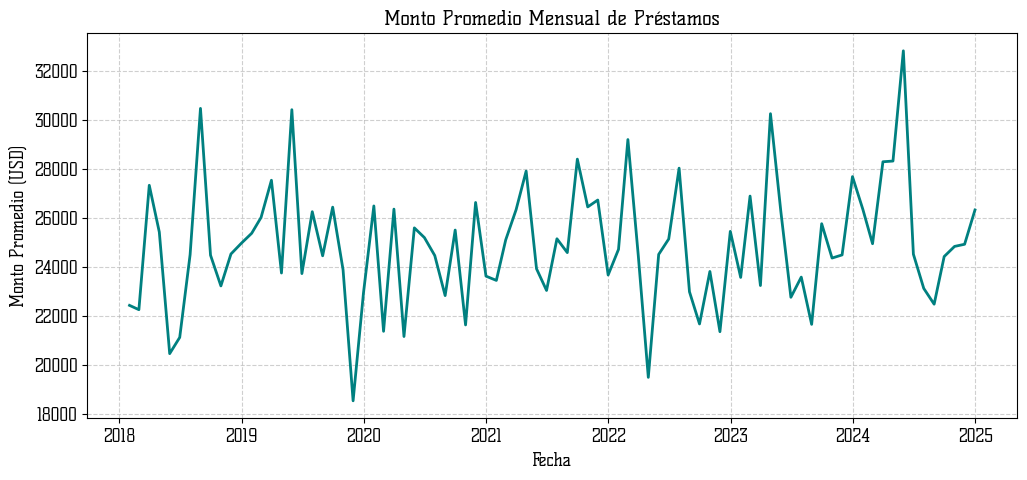

In [ ]:
# Agrupar por mes (promedio mensual)
monthly_avg = (
    df_clean.groupby(pd.Grouper(key='ApplicationDate', freq='M'))['LoanAmount']
    .mean()
    .reset_index()
)

# Visualización inicial
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg['ApplicationDate'], monthly_avg['LoanAmount'], color='teal', linewidth=2)
plt.title('Monto Promedio Mensual de Préstamos', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Monto Promedio (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
!pip install prophet --quiet

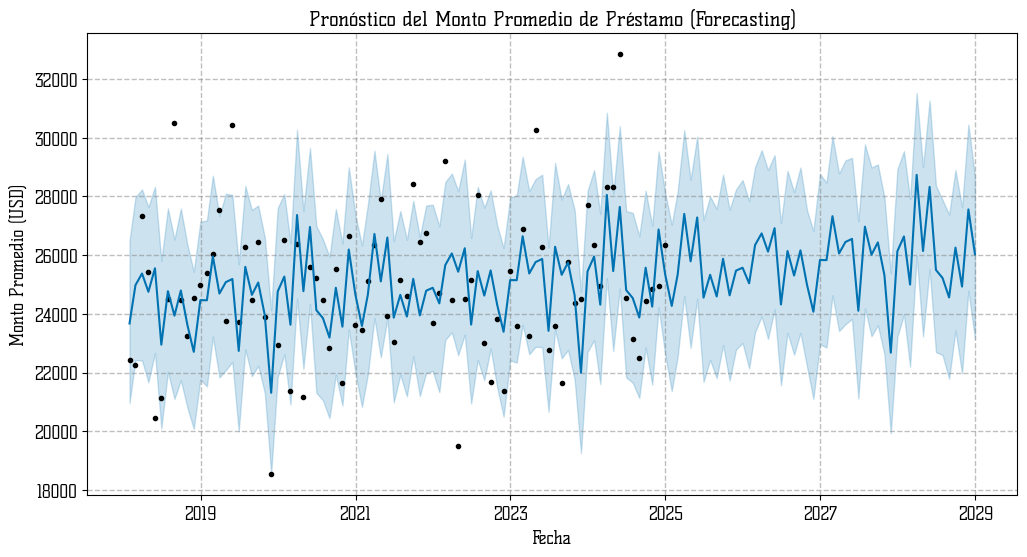

In [ ]:
from prophet import Prophet

import logging, cmdstanpy
logging.getLogger("cmdstanpy").disabled = True

# Preparar los datos correctamente
df_prophet = monthly_avg.reset_index()[['ApplicationDate', 'LoanAmount']]
df_prophet.columns = ['ds', 'y']

# Crear y entrenar el modelo Prophet
modelo = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
modelo.fit(df_prophet)

# Crear fechas futuras (12 meses más)
future = modelo.make_future_dataframe(periods=12, freq='M')
forecast = modelo.predict(future)

# Graficar resultados
fig, ax = plt.subplots(figsize=(12, 6))
modelo.plot(forecast, ax=ax)
ax.set_title('Pronóstico del Monto Promedio de Préstamo (Forecasting)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto Promedio (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

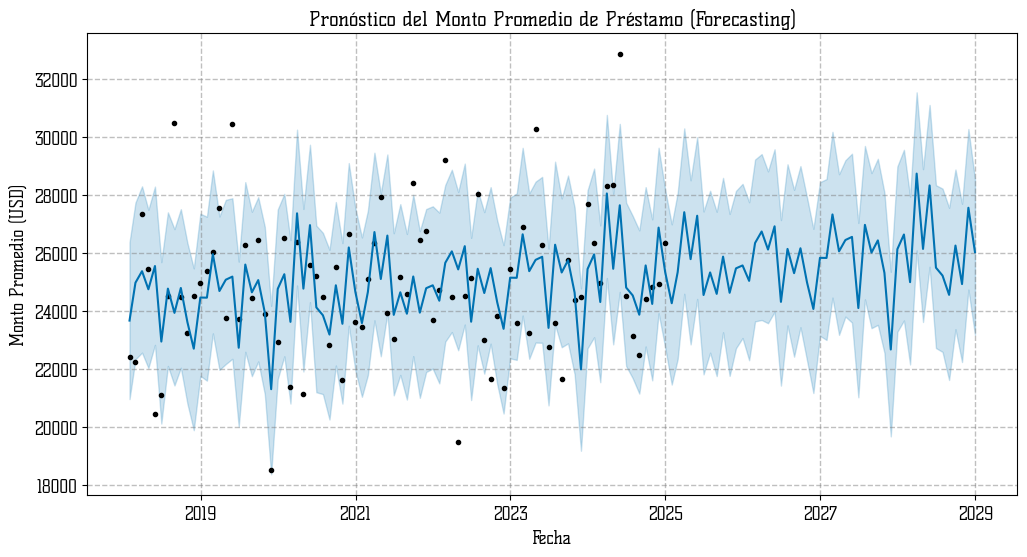

In [ ]:
# Crear fechas futuras (48 meses más)
future = modelo.make_future_dataframe(periods=48, freq='M')
forecast = modelo.predict(future)

# Graficar resultados
fig, ax = plt.subplots(figsize=(12, 6))
modelo.plot(forecast, ax=ax)
ax.set_title('Pronóstico del Monto Promedio de Préstamo (Forecasting)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Monto Promedio (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()